In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('/kaggle/input/dataset/etymology.csv')
display(etymology)

In [3]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [4]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
3884219,Halloweek,blend_of,English,week
3884331,Boell,group_related_root,NaN,NaN
3884332,Boell,borrowed_from,Danish,Bøll
3884333,Boell,borrowed_from,German,Böll


In [13]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'semi_learned_borrowing_from'], dtype=object)

In [33]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

French            4499
Latin             3504
Italian           2236
Spanish           2094
German            2056
Japanese          1840
Ancient Greek     1025
Arabic             758
Middle French      673
Russian            634
Polish             537
Hindi              508
Dutch              429
Sanskrit           417
Portuguese         317
Hebrew             309
New Latin          265
Late Latin         248
Swedish            220
Irish              209
Persian            196
Afrikaans          191
Yiddish            186
Medieval Latin     182
Korean             181
Greek              170
Armenian           158
Malay              155
Vietnamese         152
Other             2616
dtype: int64

<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

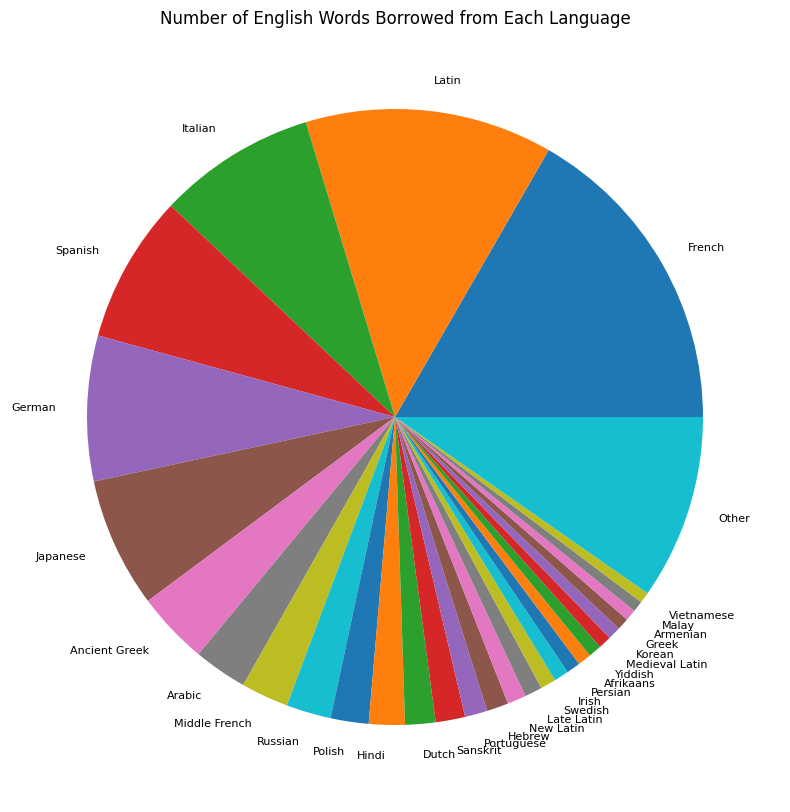

In [40]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [58]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


In [30]:
freqs = pd.read_csv('/kaggle/input/english-word-frequency/unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [39]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,cognate_of,Tocharian B,se,2.313585e+10,3.933838e-02
the,cognate_of,Swedish,ty,2.313585e+10,3.933838e-02
the,cognate_of,Icelandic,sá,2.313585e+10,3.933838e-02
the,group_related_root,NaN,NaN,2.313585e+10,3.933838e-02
the,cognate_of,Sanskrit,sá,2.313585e+10,3.933838e-02
...,...,...,...,...,...
polymethylmethacrylate,compound_of,English,polymethyl,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


In [ ]:
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df


In [ ]:
top_2000_df = borrowed_df.iloc[:2000]
top_4000_df = borrowed_df.iloc[2000:4000]
other_df = borrowed_df.iloc[4000:]

top_2000_counts = top_2000_df['related_lang'].value_counts()
top_2000_lst = top_2000_counts[top_2000_counts >= 15]
top_2000_other = pd.Series({'Other': top_2000_counts[top_2000_counts < 15].sum()})
top_2000_series = pd.concat([top_2000_lst, top_2000_other])

top_4000_counts = top_4000_df['related_lang'].value_counts()
top_4000_lst = top_4000_counts[top_4000_counts >= 15]
top_4000_other = pd.Series({'Other': top_4000_counts[top_4000_counts < 15].sum()})
top_4000_series = pd.concat([top_4000_lst, top_4000_other])

other_counts = other_df['related_lang'].value_counts()
other_lst = other_counts[other_counts >= 20]
other_other = pd.Series({'Other': other_counts[other_counts < 20].sum()})
other_series = pd.concat([other_lst, other_other])


In [ ]:
top_2000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000 English Loanwords Borrowed from Each Language', fontsize = 8)



In [ ]:
top_4000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language', fontsize = 8)


In [ ]:
other_series.plot.pie(figsize = (10, 10), title = 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language', fontsize = 8)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from scipy.stats import f_oneway

etymology = pd.read_csv('etymology.csv')
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)

freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df
group1 = borrowed_df.iloc[:2000]
group2 = borrowed_df.iloc[2000:4000]
group3 = borrowed_df.iloc[4000:]

group1_counts = group1['related_lang'].value_counts()
group2_counts = group2['related_lang'].value_counts()
group3_counts = group3['related_lang'].value_counts()

all_languages = set(group1_counts.index) | set(group2_counts.index) | set(group3_counts.index)
group1_counts = group1_counts.reindex(all_languages, fill_value=0)
group2_counts = group2_counts.reindex(all_languages, fill_value=0)
group3_counts = group3_counts.reindex(all_languages, fill_value=0)

combined = pd.DataFrame({
    'Group 1': group1_counts,
    'Group 2': group2_counts,
    'Group 3': group3_counts
}).fillna(0)


combined['Group 3']*=(2000/4138)


combined = combined.sort_values(by='Group 1')
f_oneway(combined['Group 1'], combined['Group 2'], combined['Group 3'])